#### Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("speeddating.csv")
data

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [3]:
data= data.dropna(how='any')

In [4]:
for col in data.columns:
    print(col)

has_null
wave
gender
age
age_o
d_age
d_d_age
race
race_o
samerace
importance_same_race
importance_same_religion
d_importance_same_race
d_importance_same_religion
field
pref_o_attractive
pref_o_sincere
pref_o_intelligence
pref_o_funny
pref_o_ambitious
pref_o_shared_interests
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
attractive_o
sinsere_o
intelligence_o
funny_o
ambitous_o
shared_interests_o
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
attractive_important
sincere_important
intellicence_important
funny_important
ambtition_important
shared_interests_important
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
attractive
sincere
intelligence
funny
ambition
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
attractive_partner
sincere_partner
intelligence_partner
funny_partner
ambiti

In [5]:
"""
The "speeddating" dataset you are referring to is a commonly used dataset in machine learning and statistical analysis. This dataset contains information on participants in speed dating events, including demographic information, ratings of attractiveness and sincerity, and decisions to pursue further dates.

Here are the descriptions of the columns in the "speeddating" dataset:

iid: Unique subject number, ranging from 1 to 552.
gender: Participant gender, with the value 0 indicating female and 1 indicating male.
wave: The wave of the event in which the participant took part, ranging from 1 to 21.
round: The round of speed dating within each wave, ranging from 1 to 10.
match: Binary variable indicating whether the participant made a match with their partner, with the value 1 indicating a match and 0 indicating no match.
dec: Binary variable indicating whether the participant decided to see their partner again, with the value 1 indicating "yes" and 0 indicating "no".
attr: Participant's rating of their partner's attractiveness, ranging from 0 to 10.
sinc: Participant's rating of their partner's sincerity, ranging from 0 to 10.
intel: Participant's rating of their partner's intelligence, ranging from 0 to 10.
fun: Participant's rating of their partner's fun, ranging from 0 to 10.
amb: Participant's rating of their partner's ambition, ranging from 0 to 10.
shar: Participant's rating of how much their partner shared their interests, ranging from 0 to 10.
like: Participant's overall rating of their partner, ranging from 0 to 10.
prob: Participant's rating of how likely it is that their partner will say "yes" to a further date, ranging from 0 to 10.
met: Binary variable indicating whether the participant had met their partner before, with the value 1 indicating "yes" and 0 indicating "no".
age_o: Age of participant's partner.
race_o: Race of participant's partner, with the following values: Black/African American=1, European/Caucasian-American=2, Latino/Hispanic American=3, Asian/Pacific Islander/Asian-American=4, Native American=5, Other=6.
dec_o: Binary variable indicating whether the participant's partner decided to see them again, with the value 1 indicating "yes" and 0 indicating "no".
attr_o: Partner's rating of the participant's attractiveness, ranging from 0 to 10.
sinc_o: Partner's rating of the participant's sincerity, ranging from 0 to 10.
intel_o: Partner's rating of the participant's intelligence, ranging from 0 to 10.
fun_o: Partner's rating of the participant's fun, ranging from 0 to 10.
amb_o: Partner's rating of the participant's ambition, ranging from 0 to 10.
shar_o: Partner's rating of how much the participant shared their interests, ranging from 0 to 10.
like_o: Partner's overall rating of the participant, ranging from 0 to 10.
prob_o: Partner's rating of how likely it is that the participant will say "yes" to a further date, ranging from 0 to 10.
met_o: Binary variable indicating whether the participant's partner had met them before, with the value 1 indicating "yes" and 0 indicating "no".
age: Age of the participant.
field: Field of study or occupation of the participant.
field_cd: Numeric code indicating the field of study or occupation of the participant.
undergra: Whether the participant completed an undergraduate degree, with the value 1 indicating "yes" and 0 indicating "no".
mn_sat: Median SAT score for the undergraduate institution attended by the participant.
tuition: Tuition for the undergraduate institution attended by the participant.
race: Race of the participant, with the same coding as the "race_o" variable.
imprace: Participant's rating of how important it is to them to date someone of their own race, ranging from 1 (not important) to 10 (very important).
imprelig: Participant's rating of how important it is to them to date someone of the same religion, ranging from 1 (not important) to 10 (very important).
from: Participant's location, as categorized by the US Census Bureau.
zipcode: Participant's ZIP code.
income: Participant's income, ranging from 1 (less than $10,000) to 8 (greater than $200,000).
goal: Participant's reason for attending the speed dating event, with the following values: Seemed like a fun night out=1, To meet new people=2, To get a date=3, Looking for a serious relationship=4, To say I did it=5, Other=6.
date: Numeric variable indicating how frequently the participant goes on dates, ranging from 1 (never) to 7 (more than once a week).
go_out: Numeric variable indicating how frequently the participant goes out socially, ranging from 1 (never) to 7 (more than once a week).
career: Participant's career, if applicable.
career_c: Numeric code indicating the participant's career, if applicable.
sports: Participant's level of interest in sports, ranging from 1 (not at all interested) to 10 (very interested).
tvsports: Participant's level of interest in watching sports on TV, ranging from 1 (not at all interested) to 10 (very interested).
exercise: Participant's level of interest in exercise, ranging from 1 (not at all interested) to 10 (very interested).
dining: Participant's level of interest in dining out, ranging from 1 (not at all interested) to 10 (very interested).
museums: Participant's level of interest in visiting museums, ranging from 1 (not at all interested) to 10 (very interested).
art: Participant's level of interest in the arts, ranging from 1 (not at all interested) to 10 (very interested).
hiking: Participant's level of interest in hiking, ranging from 1 (not at all interested) to 10 (very interested).
gaming: Participant's level of interest in playing games, ranging from 1 (not at all interested) to 10 (very interested).
clubbing: Participant's level of interest in going to nightclubs, ranging from 1 (not at all interested) to 10 (very interested).
reading: Participant's level of interest in reading, ranging from 1 (not at all interested) to 10 (very interested).
tv: Participant's level of interest in watching TV, ranging from 1 (not at all interested) to 10 (very interested).
theater: Participant's level of interest in going to the theater, ranging from 1 (not at all interested) to 10 (very interested).

movies: Participant's level of interest in watching movies, ranging from 1 (not at all interested) to 10 (very interested).
concerts: Participant's level of interest in attending concerts, ranging from 1 (not at all interested) to 10 (very interested).
music: Participant's level of interest in music, ranging from 1 (not at all interested) to 10 (very interested).
shopping: Participant's level of interest in shopping, ranging from 1 (not at all interested) to 10 (very interested).
yoga: Participant's level of interest in practicing yoga, ranging from 1 (not at all interested) to 10 (very interested).
interests_correlate: Correlation between participant's stated interests and their partner's interests, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).
expected_happy_with_sd_people: Participant's expected happiness with the people they met at the speed dating event, ranging from 0 (extremely unhappy) to 10 (extremely happy).
expected_num_interested_in_me: Participant's expected number of people who would be interested in dating them, ranging from 0 to 20.
expected_num_matches: Participant's expected number of matches, or mutual interests in dating, ranging from 0 to 20.
like: Whether the participant liked their date, with the value 1 indicating "yes" and 0 indicating "no".
guess_prob_liked: Participant's estimate of the probability that their date liked them, ranging from 0 to 1.
met: Whether the participant and their date met again, with the value 1 indicating "yes" and 0 indicating "no".
decision: Participant's decision about whether to see their date again, with the following values: No=0, Yes=1.


"""

'\nThe "speeddating" dataset you are referring to is a commonly used dataset in machine learning and statistical analysis. This dataset contains information on participants in speed dating events, including demographic information, ratings of attractiveness and sincerity, and decisions to pursue further dates.\n\nHere are the descriptions of the columns in the "speeddating" dataset:\n\niid: Unique subject number, ranging from 1 to 552.\ngender: Participant gender, with the value 0 indicating female and 1 indicating male.\nwave: The wave of the event in which the participant took part, ranging from 1 to 21.\nround: The round of speed dating within each wave, ranging from 1 to 10.\nmatch: Binary variable indicating whether the participant made a match with their partner, with the value 1 indicating a match and 0 indicating no match.\ndec: Binary variable indicating whether the participant decided to see their partner again, with the value 1 indicating "yes" and 0 indicating "no".\nattr: 

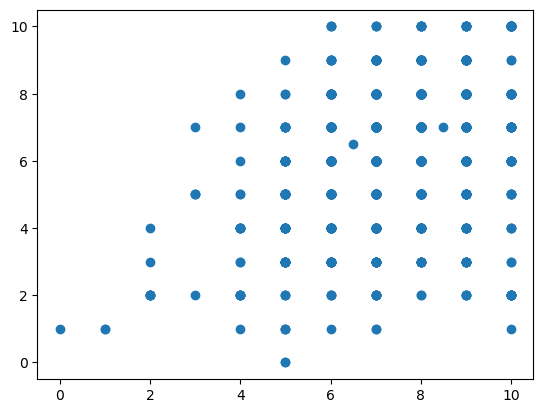

In [6]:
plt.scatter(data["intelligence_o"],data["attractive_o"])

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


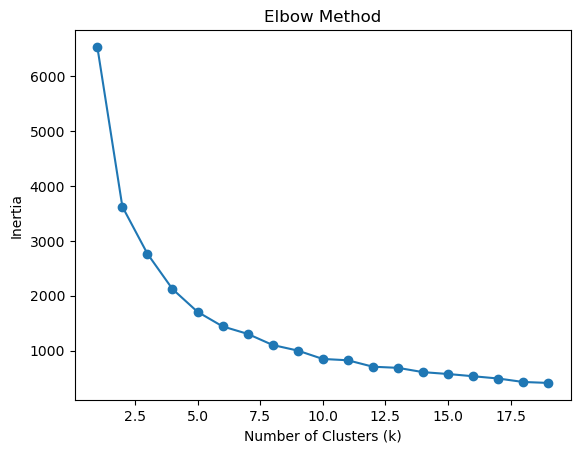

In [7]:
# Create an empty list to store the inertia values for each k
inertias = []

# Define a range of k values to test
k_values = range(1, 20)

# Loop through each k value and fit a KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[["intelligence_o", "attractive_o"]])
    
    # Append the inertia value to the list
    inertias.append(kmeans.inertia_)
    
# Plot the inertia values for each k value
plt.plot(k_values, inertias, "o-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

C:\Users\afrincon\AppData\Local\Temp\ipykernel_15424\2163898834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label_Kmeans"]=labels


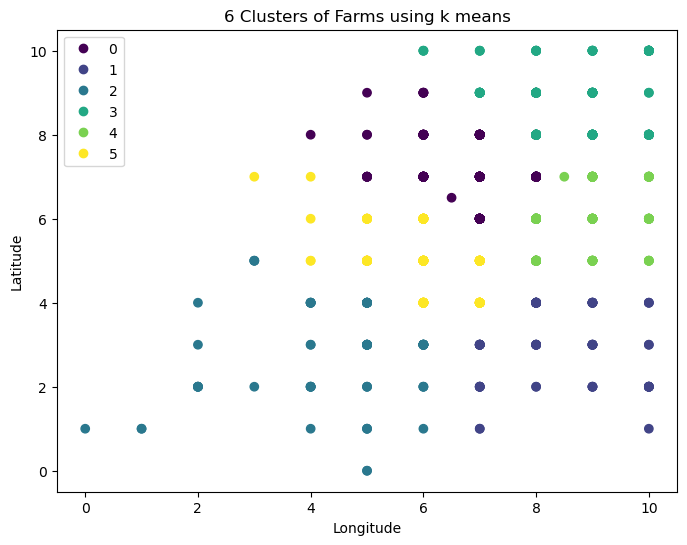

In [8]:

# Define the number of clusters to create
n_clusters = 6

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the farm data
kmeans.fit(data[["intelligence_o", "attractive_o"]])

# Get the labels for each farm point
labels = kmeans.labels_
data["label_Kmeans"]=labels
# Plot the farms with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.title(f"{n_clusters} Clusters of Farms using k means")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sc=plt.scatter(data["intelligence_o"], data["attractive_o"], c=labels, cmap="viridis")
plt.legend(*sc.legend_elements())
plt.show()

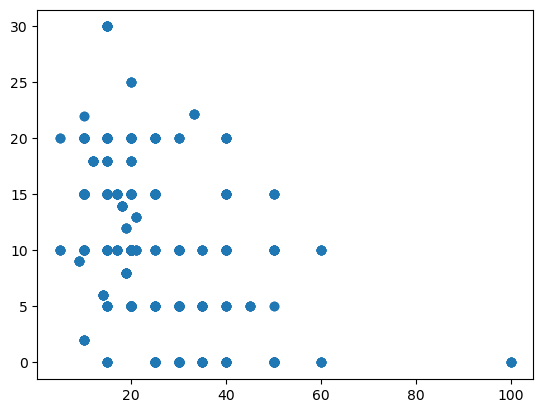

In [9]:
plt.scatter(data["pref_o_attractive"],data["pref_o_shared_interests"])

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


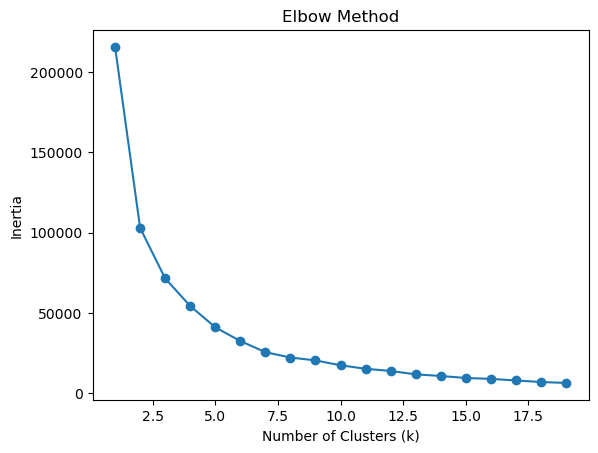

In [10]:


# Create an empty list to store the inertia values for each k
inertias = []

# Define a range of k values to test
k_values = range(1, 20)

# Loop through each k value and fit a KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[["pref_o_attractive","pref_o_shared_interests"]])
    
    # Append the inertia value to the list
    inertias.append(kmeans.inertia_)
    
# Plot the inertia values for each k value
plt.plot(k_values, inertias, "o-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

C:\Users\afrincon\AppData\Local\Temp\ipykernel_15424\497966358.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label_Kmeans"]=labels


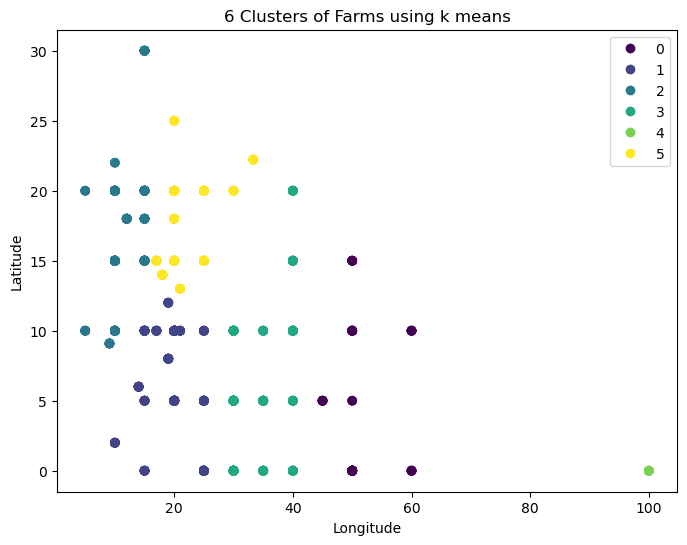

In [11]:

# Define the number of clusters to create
n_clusters = 6

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the farm data
kmeans.fit(data[["pref_o_attractive","pref_o_shared_interests"]])

# Get the labels for each farm point
labels = kmeans.labels_
data["label_Kmeans"]=labels
# Plot the farms with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.title(f"{n_clusters} Clusters of Farms using k means")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sc=plt.scatter(data["pref_o_attractive"],data["pref_o_shared_interests"], c=labels, cmap="viridis")
plt.legend(*sc.legend_elements())
plt.show()